In [3]:
#导入数据预处理工具
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
wine=load_wine()
#对红酒数据集进行预处理
scaler= StandardScaler()
X = wine.data
y = wine.target
X_scaled = scaler.fit_transform(X)
#付T~P处理后的数据集形态
print (X_scaled.shape)

(178, 13)


In [26]:
#导入PCA
from sklearn.decomposition import PCA
#设置主成分数量为2 以便我们进行可视化
pca = PCA(n_components=2)
pca.fit(X_scaled)#先fit一下
X_pca = pca.transform(X_scaled)#再transform
#打印主成分提取后的数据形态
print(X_pca.shape)

(178, 2)


可以看到，特征数由原来的13变成了现在的2

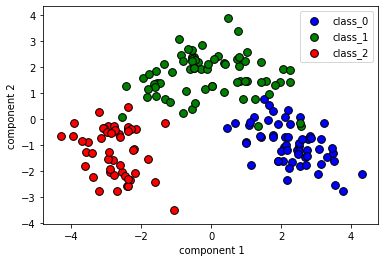

In [27]:
#将三个分类中的主成分提取出来
import matplotlib.pyplot as plt
X0 = X_pca[wine.target==0]
X1 = X_pca[wine.target==1]
X2 = X_pca[wine.target==2]
#绘制散点图
plt.scatter(X0 [:,0] , X0 [:, 1] , c =  "b" , s=60 , edgecolor= "k" )
plt.scatter(X1 [:,0] , X1 [:, 1] , c =  "g" , s=60 , edgecolor= "k" )
plt.scatter(X2 [:,0] , X2 [:, 1] , c =  "r" , s=60 , edgecolor= "k" )
#设置图注
plt.legend(wine.target_names,loc= "best" )
plt.xlabel (" component 1" )
plt.ylabel (  "component 2" )
#显示图像
plt.show ()

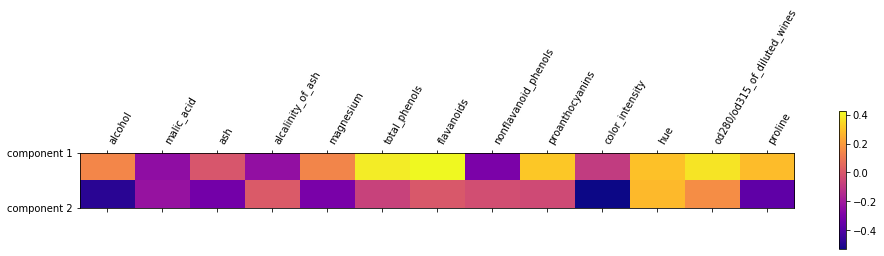

In [28]:
#使用主成分绘制热度图
plt.matshow(pca.components_, cmap= "plasma" )
#纵轴为主成分数
plt.yticks([0,1],["component 1","component 2"])
plt.colorbar()
#横轴为原始特征数量
plt.xticks(range(len(wine.feature_names)) , wine.feature_names ,
rotation=60,ha='left')
#显示图像
plt.show()

在sklearn 中， PCA 的n_components
不仅可以代表成分的个数，还可以设置为降维之后保留信息的百分比，例如我们希望降
维之后保留原特征90% 的信息， 那么就可以设置n components 为0.9 

In [29]:
#导入PCA
from sklearn.decomposition import PCA
#设置主成分数量为2 以便我们进行可视化
pca = PCA(n_components=0.9)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
#打印主成分提取后的数据形态
print(X_pca.shape)

(178, 8)


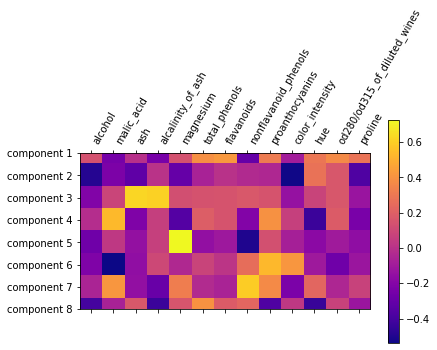

In [30]:
#使用主成分绘制热度图
plt.matshow(pca.components_, cmap= "plasma" )
#纵轴为主成分数
plt.yticks([0,1,2,3,4,5,6,7],["component 1","component 2","component 3","component 4","component 5","component 6","component 7","component 8"])
plt.colorbar()
#横轴为原始特征数量
plt.xticks(range(len(wine.feature_names)) , wine.feature_names ,
rotation=60,ha='left')
#显示图像
plt.show()